In [116]:
import skfuzzy as skf
import numpy as np
from matplotlib import pyplot as plt
from skfuzzy import control as ctrl

In [117]:
def trapezoid(array, a, b, c, d):
    res = np.zeros_like(array)
    div1 = b - a
    div2 = c - d
    for i, x in enumerate(array):
        if x <= a or x >= d:
            res[i] = 0
        elif b <= x <= c:
            res[i] = 1.
        elif a < x < b:
            res[i] = (x - a)/div1
        elif c < x < d:
            res[i] = (x - d)/div2

    return res

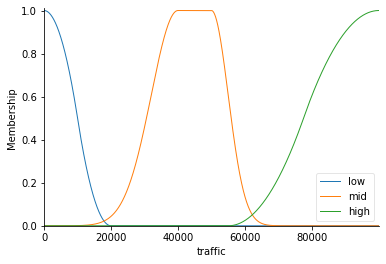

In [118]:
traffic = ctrl.Antecedent(np.arange(0, 100000, 0.1), "traffic")

traffic['low'] = skf.zmf(traffic.universe, 0, 20000)
traffic["mid"] = skf.gauss2mf(traffic.universe, 40000, 8000, 50000, 5000)
traffic["high"] = skf.smf(traffic.universe, 55000, 100000)

traffic.view()

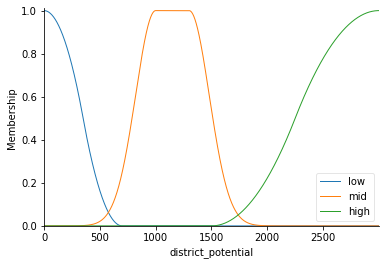

In [119]:
district_potential = ctrl.Antecedent(np.arange(0, 3000, 0.1), "district_potential")

district_potential["low"] = skf.zmf(district_potential.universe, 0, 700)
district_potential["mid"] = skf.gauss2mf(district_potential.universe, 1000, 180, 1300, 180)
district_potential["high"] = skf.smf(district_potential.universe, 1500, 3000)

district_potential.view()

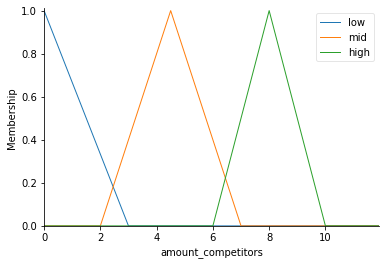

In [120]:
amount_competitors = ctrl.Antecedent(np.arange(0, 12, 0.1), "amount_competitors")

amount_competitors["low"] = trapezoid(amount_competitors.universe, -1, 0, 0, 3)
amount_competitors["mid"] = trapezoid(amount_competitors.universe, 2, 4.5, 4.5, 7)
amount_competitors["high"] = trapezoid(amount_competitors.universe, 6, 8, 8, 10)

amount_competitors.view()

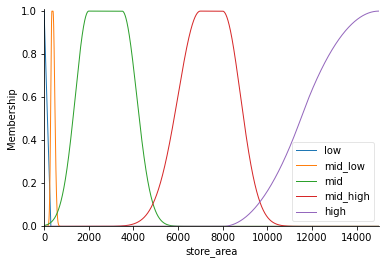

In [121]:
store_area = ctrl.Antecedent(np.arange(0, 15000, 0.1), "store_area")

store_area["low"] = trapezoid(store_area.universe, -1, 0, 0, 300)
store_area["mid_low"] = skf.gauss2mf(store_area.universe, 350, 50, 400, 80)
store_area["mid"] = skf.gauss2mf(store_area.universe, 2000, 600, 3500, 650)
store_area["mid_high"] = skf.gauss2mf(store_area.universe, 7000, 1000, 8000, 800)
store_area["high"] = skf.smf(store_area.universe, 8000, 15000)

store_area.view()

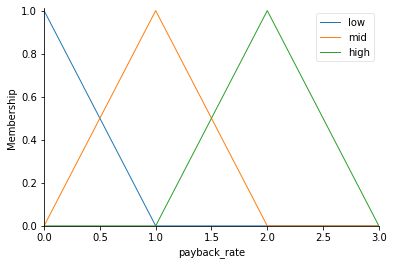

In [122]:
payback_rate = ctrl.Consequent(np.arange(0, 4, 1), "payback_rate")

payback_rate['low'] = trapezoid(payback_rate.universe, -1, 0, 0, 1)
payback_rate['mid'] = trapezoid(payback_rate.universe, 0, 1, 1, 2)
payback_rate['high'] = trapezoid(payback_rate.universe, 1, 2, 2, 3)

payback_rate.view()

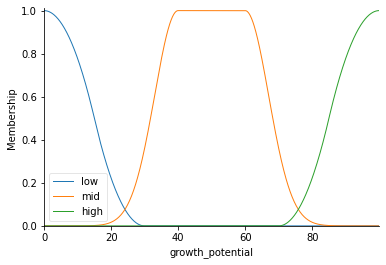

In [123]:
growth_potential = ctrl.Consequent(np.arange(0, 100, 0.1), "growth_potential")

growth_potential['low'] = skf.zmf(growth_potential.universe, 0, 30)
growth_potential['mid'] = skf.gauss2mf(growth_potential.universe, 40, 7, 60, 7)
growth_potential['high'] = skf.smf(growth_potential.universe, 70, 100)

growth_potential.view()

In [124]:
rule1 = ctrl.Rule(traffic['mid'] & district_potential['mid'] & amount_competitors['mid'] & store_area['mid'], 
                  [payback_rate['mid'], growth_potential['mid']])
rule2 = ctrl.Rule(traffic['low'] & district_potential['mid'] & amount_competitors['mid'] & store_area['mid'], 
                  [payback_rate['low'], growth_potential['low']])
rule3 = ctrl.Rule(traffic['high'] & district_potential['mid'] & amount_competitors['mid'] & store_area['mid'], 
                  [payback_rate['high'], growth_potential['high']])
rule4 = ctrl.Rule(traffic['mid'] & district_potential['low'] & amount_competitors['mid'] & store_area['mid'], 
                  [payback_rate['mid'], growth_potential['low']])
rule5 = ctrl.Rule(traffic['mid'] & district_potential['high'] & amount_competitors['mid'] & store_area['mid'], 
                  [payback_rate['mid'], growth_potential['high']])
rule6 = ctrl.Rule(traffic['mid'] & district_potential['mid'] & amount_competitors['low'] & store_area['mid'], 
                  [payback_rate['high'], growth_potential['mid']])
rule7 = ctrl.Rule(traffic['mid'] & district_potential['mid'] & amount_competitors['high'] & store_area['mid'], 
                  [payback_rate['low'], growth_potential['low']])
rule8 = ctrl.Rule(traffic['mid'] & district_potential['mid'] & amount_competitors['mid'] & store_area['low'], 
                  [payback_rate['high'], growth_potential['mid']])
rule9 = ctrl.Rule(traffic['mid'] & district_potential['mid'] & amount_competitors['mid'] & store_area['mid_low'], 
                  [payback_rate['high'], growth_potential['mid']])
rule10 = ctrl.Rule(traffic['mid'] & district_potential['mid'] & amount_competitors['mid'] & store_area['mid_high'], 
                  [payback_rate['mid'], growth_potential['mid']])
rule11 = ctrl.Rule(traffic['mid'] & district_potential['mid'] & amount_competitors['mid'] & store_area['high'], 
                  [payback_rate['low'], growth_potential['low']])
rule12 = ctrl.Rule(traffic['low'] & district_potential['low'] & amount_competitors['mid'] & store_area['mid'], 
                  [payback_rate['low'], growth_potential['low']])
rule13 = ctrl.Rule(traffic['low'] & district_potential['high'] & amount_competitors['mid'] & store_area['mid'], 
                  [payback_rate['low'], growth_potential['mid']])
rule14 = ctrl.Rule(traffic['low'] & district_potential['mid'] & amount_competitors['low'] & store_area['mid'], 
                  [payback_rate['mid'], growth_potential['mid']])
rule15 = ctrl.Rule(traffic['low'] & district_potential['mid'] & amount_competitors['high'] & store_area['mid'], 
                  [payback_rate['low'], growth_potential['low']])
rule16 = ctrl.Rule(traffic['low'] & district_potential['mid'] & amount_competitors['mid'] & store_area['low'], 
                  [payback_rate['mid'], growth_potential['mid']])
rule17 = ctrl.Rule(traffic['high'] & district_potential['low'] & amount_competitors['mid'] & store_area['mid'], 
                  [payback_rate['mid'], growth_potential['low']])
rule18 = ctrl.Rule(traffic['high'] & district_potential['high'] & amount_competitors['mid'] & store_area['mid'], 
                  [payback_rate['high'], growth_potential['high']])
rule19 = ctrl.Rule(traffic['high'] & district_potential['mid'] & amount_competitors['low'] & store_area['mid'], 
                  [payback_rate['high'], growth_potential['mid']])
rule20 = ctrl.Rule(traffic['high'] & district_potential['mid'] & amount_competitors['high'] & store_area['mid'], 
                  [payback_rate['low'], growth_potential['low']])
rule21 = ctrl.Rule(traffic['high'] & district_potential['mid'] & amount_competitors['mid'] & store_area['low'], 
                  [payback_rate['high'], growth_potential['mid']])
rule22 = ctrl.Rule(traffic['high'] & district_potential['mid'] & amount_competitors['mid'] & store_area['mid_low'], 
                  [payback_rate['high'], growth_potential['mid']])
rule23 = ctrl.Rule(traffic['high'] & district_potential['mid'] & amount_competitors['mid'] & store_area['mid_high'], 
                  [payback_rate['mid'], growth_potential['mid']])
rule24 = ctrl.Rule(traffic['high'] & district_potential['mid'] & amount_competitors['mid'] & store_area['high'], 
                  [payback_rate['low'], growth_potential['low']])
rule25 = ctrl.Rule(traffic['high'] & district_potential['high'] & amount_competitors['low'] & store_area['mid'], 
                  [payback_rate['high'], growth_potential['high']])
rule26 = ctrl.Rule(traffic['high'] & district_potential['high'] & amount_competitors['high'] & store_area['mid'], 
                  [payback_rate['mid'], growth_potential['mid']])
rule27 = ctrl.Rule(traffic['high'] & district_potential['high'] & amount_competitors['mid'] & store_area['low'], 
                  [payback_rate['high'], growth_potential['high']])
rule28 = ctrl.Rule(traffic['high'] & district_potential['high'] & amount_competitors['mid'] & store_area['mid_low'], 
                  [payback_rate['high'], growth_potential['high']])
rule29 = ctrl.Rule(traffic['high'] & district_potential['high'] & amount_competitors['mid'] & store_area['mid_high'], 
                  [payback_rate['high'], growth_potential['high']])
rule30 = ctrl.Rule(traffic['high'] & district_potential['high'] & amount_competitors['mid'] & store_area['high'], 
                  [payback_rate['mid'], growth_potential['mid']])
rule31 = ctrl.Rule(traffic['high'] & district_potential['low'] & amount_competitors['low'] & store_area['mid'], 
                  [payback_rate['mid'], growth_potential['low']])
rule32 = ctrl.Rule(traffic['high'] & district_potential['low'] & amount_competitors['high'] & store_area['mid'], 
                  [payback_rate['low'], growth_potential['low']])
rule33 = ctrl.Rule(traffic['high'] & district_potential['low'] & amount_competitors['mid'] & store_area['low'], 
                  [payback_rate['mid'], growth_potential['low']])
rule34 = ctrl.Rule(traffic['high'] & district_potential['low'] & amount_competitors['mid'] & store_area['high'], 
                  [payback_rate['low'], growth_potential['low']])

In [125]:
rules_base = [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
              rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19,
              rule20, rule21, rule23, rule24, rule25, rule26, rule28,
              rule29, rule31, rule32, rule33, rule34]

mark_ctrl = ctrl.ControlSystem(rules_base)
marking = ctrl.ControlSystemSimulation(mark_ctrl)

0.9999999999999999
49.999999986923186


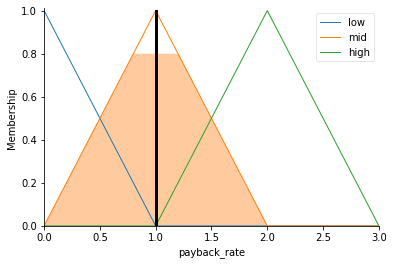

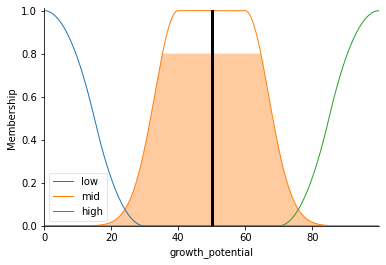

In [126]:
#1
marking.input['traffic'] = 42000
marking.input['district_potential'] = 1000
marking.input['amount_competitors'] = 4
marking.input['store_area'] = 2500
marking.compute()

print(marking.output['payback_rate'])
payback_rate.view(sim=marking)
print(marking.output['growth_potential'])
growth_potential.view(sim=marking)

1.0001282620299714
49.99999998772941


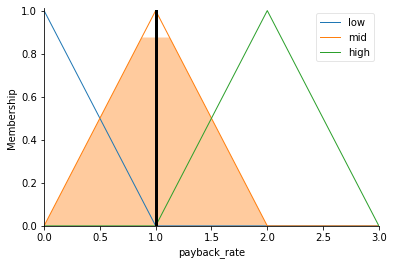

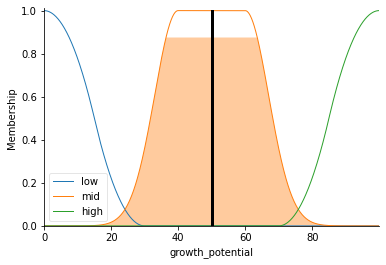

In [127]:
#2 
marking.input['traffic'] = 5000
marking.input['district_potential'] = 1000
marking.input['amount_competitors'] = 0
marking.input['store_area'] = 2500
marking.compute()

print(marking.output['payback_rate'])
payback_rate.view(sim=marking)
print(marking.output['growth_potential'])
growth_potential.view(sim=marking)

1.0106021298908776
11.982663508092836


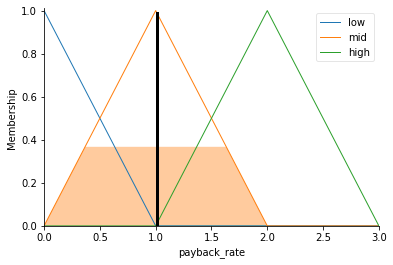

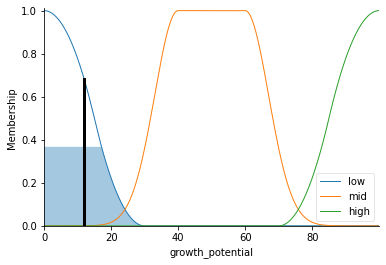

In [128]:
#3
marking.input['traffic'] = 82000
marking.input['district_potential'] = 400
marking.input['amount_competitors'] = 4
marking.input['store_area'] = 2500
marking.compute()

print(marking.output['payback_rate'])
payback_rate.view(sim=marking)
print(marking.output['growth_potential'])
growth_potential.view(sim=marking)

1.9999999974950327
90.3227230226302


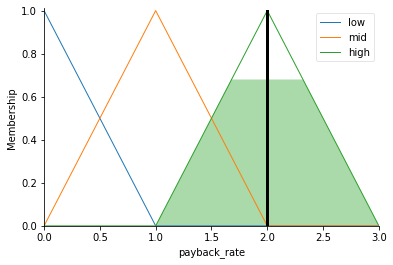

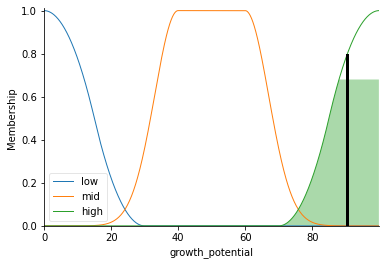

In [129]:
#4
marking.input['traffic'] = 82000
marking.input['district_potential'] = 2500
marking.input['amount_competitors'] = 4
marking.input['store_area'] = 2500
marking.compute()

print(marking.output['payback_rate'])
payback_rate.view(sim=marking)
print(marking.output['growth_potential'])
growth_potential.view(sim=marking)

0.9889325934453437
48.508139525042566


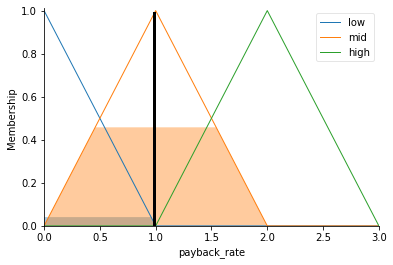

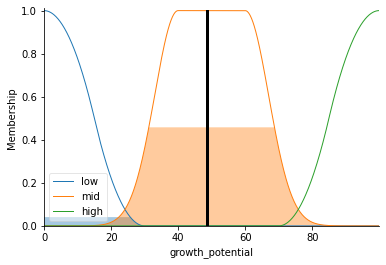

In [130]:
#5
marking.input['traffic'] = 82000
marking.input['district_potential'] = 1000
marking.input['amount_competitors'] = 4
marking.input['store_area'] = 9000
marking.compute()

print(marking.output['payback_rate'])
payback_rate.view(sim=marking)
print(marking.output['growth_potential'])
growth_potential.view(sim=marking)

1.9999999994641031
89.45296570621717


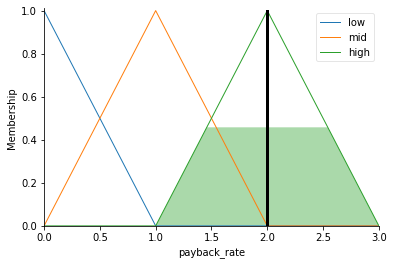

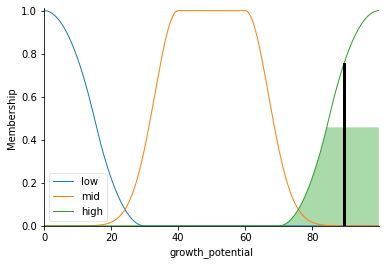

In [131]:
#6

marking.input['traffic'] = 82000
marking.input['district_potential'] = 2500
marking.input['amount_competitors'] = 4
marking.input['store_area'] = 9000
marking.compute()

print(marking.output['payback_rate'])
payback_rate.view(sim=marking)
print(marking.output['growth_potential'])
growth_potential.view(sim=marking)

0.4150510204081633
10.928647919473516


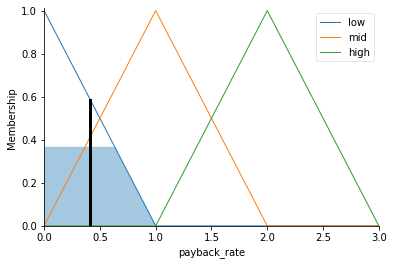

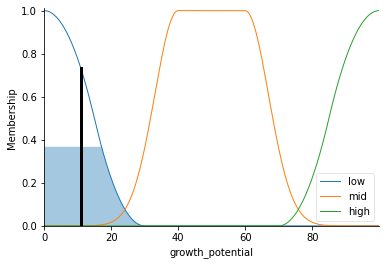

In [132]:
#7 
marking.input['traffic'] = 82000
marking.input['district_potential'] = 400
marking.input['amount_competitors'] = 8
marking.input['store_area'] = 2500
marking.compute()

print(marking.output['payback_rate'])
payback_rate.view(sim=marking)
print(marking.output['growth_potential'])
growth_potential.view(sim=marking)

0.5794144172017138
20.741061111343697


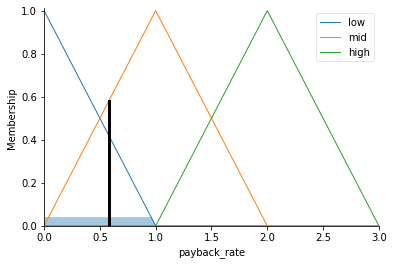

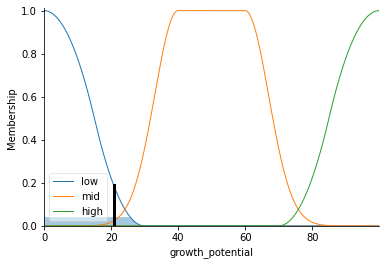

In [133]:
#8
marking.input['traffic'] = 82000
marking.input['district_potential'] = 400
marking.input['amount_competitors'] = 4
marking.input['store_area'] = 9000
marking.compute()

print(marking.output['payback_rate'])
payback_rate.view(sim=marking)
print(marking.output['growth_potential'])
growth_potential.view(sim=marking)

1.9999999130932082
85.69001338548485


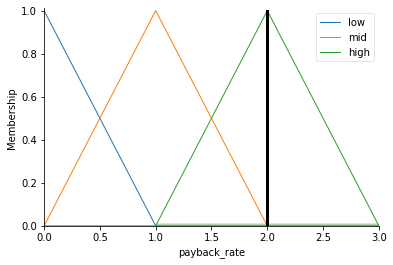

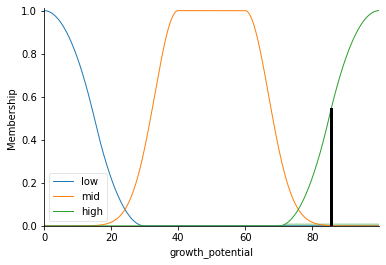

In [134]:
#9
marking.input['traffic'] = 82000
marking.input['district_potential'] = 2500
marking.input['amount_competitors'] = 4
marking.input['store_area'] = 200
marking.compute()

print(marking.output['payback_rate'])
payback_rate.view(sim=marking)
print(marking.output['growth_potential'])
growth_potential.view(sim=marking)

0.34699306262301505
50.000783438013336


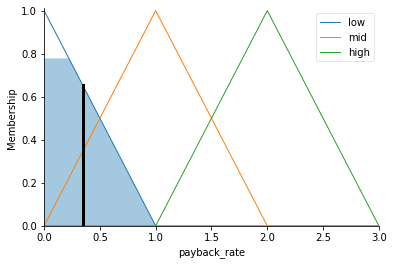

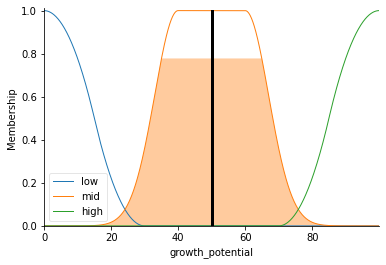

In [135]:
#10
marking.input['traffic'] = 5000
marking.input['district_potential'] = 2500
marking.input['amount_competitors'] = 4
marking.input['store_area'] = 2500
marking.compute()

print(marking.output['payback_rate'])
payback_rate.view(sim=marking)
print(marking.output['growth_potential'])
growth_potential.view(sim=marking)